# Face It.. We'hv got feelings EDA

In [ ]:
#!pip install tensorflow

In [ ]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # disable GPU
# import tensorflow as tf

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from keras import Sequential, Input, layers


In [16]:
# --- setting environment ------
os.environ['dipaliahirrao'] = "dipaliahirrao"
os.environ['fae34ac4d44d5100b2b2aee4f5630e01'] = "fae34ac4d44d5100b2b2aee4f5630e01"

In [17]:
# --- dataset download

!curl -L -o /content/emotion-detection-fer.zip \
  -u $dipaliahirrao:$fae34ac4d44d5100b2b2aee4f5630e01 \
   https://www.kaggle.com/api/v1/datasets/download/sudarshanvaidya/random-images-for-face-emotion-recognition

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 45.6M  100 45.6M    0     0  46.0M      0 --:--:-- --:--:-- --:--:-- 41.8M


In [18]:
# ----- unzip dataset
!unzip -q /content/emotion-detection-fer.zip -d /content/Face_it_Data

In [12]:
#!rm -rf /content/Face_it_Data

In [111]:
#!ls /content

In [19]:
import os
data_dir = "/content/Face_it_Data"
print("Emotion categories:", os.listdir(data_dir))

Emotion categories: ['anger', 'sadness', 'happiness', 'disgust', 'contempt', 'fear', 'surprise', 'neutrality']


In [20]:
# data_dir = "/content/drive/MyDrive/Face_it_Data"
# import os

# emotions = os.listdir(data_dir)
# print("Emotion categories:", emotions)

In [ ]:
# data_dir = "/home/deepa/code/hannahkiesow/face_it/raw_data/Face_it_Data"

In [21]:
emotions = os.listdir(data_dir)
print("Emotion categories:", emotions)

Emotion categories: ['anger', 'sadness', 'happiness', 'disgust', 'contempt', 'fear', 'surprise', 'neutrality']


In [22]:
extensions = set()

for root, dirs, files in os.walk(data_dir):
    for f in files:
        ext = os.path.splitext(f)[1].lower()
        extensions.add(ext)

print("Available extensions:", extensions)

Available extensions: {'.png'}


In [23]:
folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]
counts = []
for folder in folders:
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        images = [f for f in os.listdir(folder_path) if f.endswith('.png')]
        counts.append(len(images))
        print(f"{folder}: {len(images)} images")

anger: 890 images
sadness: 746 images
happiness: 1406 images
disgust: 439 images
contempt: 208 images
fear: 570 images
surprise: 775 images
neutrality: 524 images


In [24]:
def show_images(emotion, n=5):
    folder = os.path.join(data_dir, emotion)
    files = [f for f in os.listdir(folder) if f.endswith('.png')][:n]
    plt.Figure(figsize=(10,10))
    for i, file in enumerate(files):
        img_path = os.path.join(folder, file)
        img = mpimg.imread(img_path)

        plt.subplot(5,5, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(emotion)
        plt.axis("off")
    plt.show()

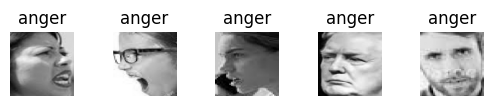

In [25]:
show_images("anger")

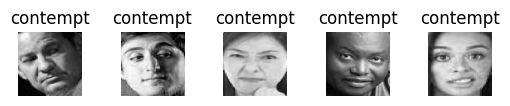

In [26]:
show_images("contempt")

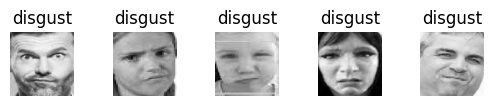

In [27]:
show_images("disgust")

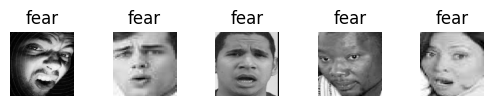

In [28]:
show_images("fear")

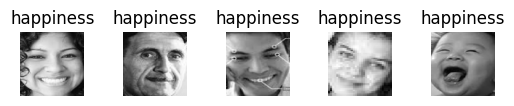

In [29]:
show_images("happiness")

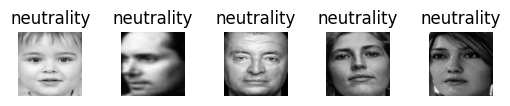

In [30]:
show_images("neutrality")

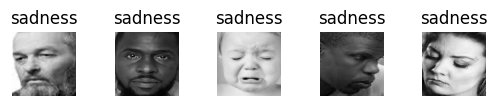

In [31]:
show_images("sadness")

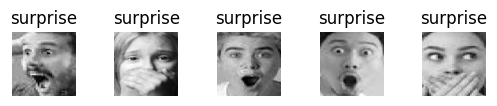

In [32]:
show_images("surprise")

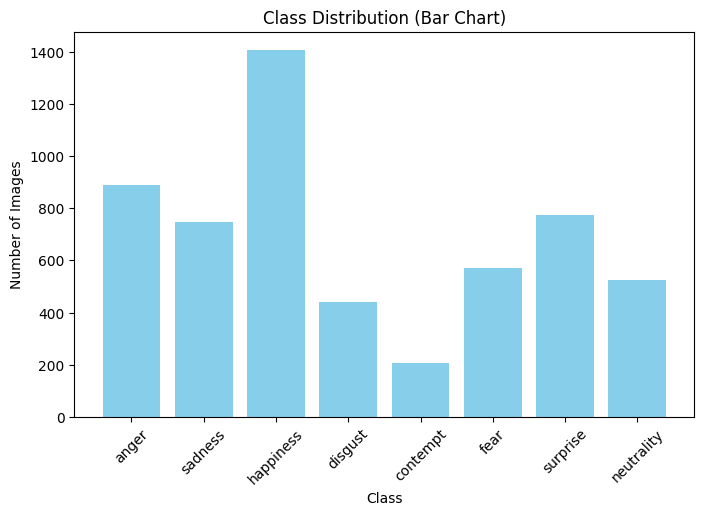

In [34]:
plt.figure(figsize=(8,5))
plt.bar(folders, counts, color="skyblue")
plt.xticks(rotation=45)
plt.title("Class Distribution (Bar Chart)")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

In [35]:
len(folders)

8

In [36]:
data_info = {f: (len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]), mpimg.imread(os.path.join(data_dir,f,[i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')][0])).shape) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(data_info)

{'anger': (890, (224, 224)), 'sadness': (746, (224, 224)), 'happiness': (1406, (224, 224)), 'disgust': (439, (224, 224)), 'contempt': (208, (224, 224)), 'fear': (570, (224, 224)), 'surprise': (775, (224, 224)), 'neutrality': (524, (224, 224))}


### List of unique shapes across all images

In [37]:
unique_shapes = set(mpimg.imread(os.path.join(data_dir,f,i)).shape for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f)) for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))
print(unique_shapes)

{(224, 224)}


In [38]:
total_images = sum(len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f)))
print(total_images)

5558


In [39]:
avg_shape = {f: (sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[0] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]),
                 sum(mpimg.imread(os.path.join(data_dir,f,i)).shape[1] for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png'))//len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')]))
             for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))}
print(avg_shape)

{'anger': (224, 224), 'sadness': (224, 224), 'happiness': (224, 224), 'disgust': (224, 224), 'contempt': (224, 224), 'fear': (224, 224), 'surprise': (224, 224), 'neutrality': (224, 224)}


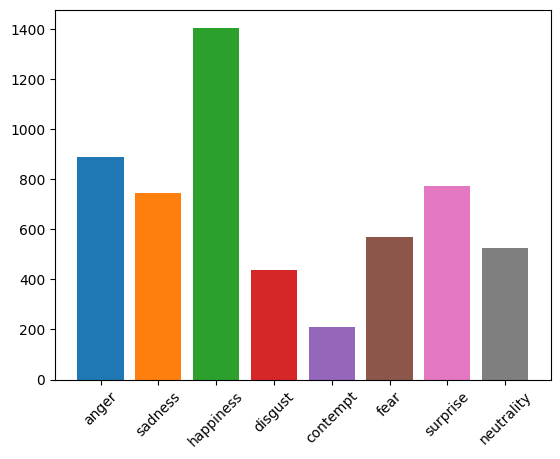

In [40]:
import matplotlib.pyplot as plt
[plt.bar(f, len([i for i in os.listdir(os.path.join(data_dir,f)) if i.endswith('.png')])) for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,f))]; plt.xticks(rotation=45); plt.show()

In [41]:
sample_image_path = os.path.join(data_dir, "anger", "2Q___face.png")
img = mpimg.imread(sample_image_path)

print(img.shape)

(224, 224)


In [155]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="training",
    seed=42,
    shuffle=True,
    image_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)

temp_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.3,
    subset="validation",
    seed=42,
    shuffle=True,
    image_size=(224,224),
    color_mode="grayscale",
    batch_size=32,
    label_mode="categorical"
)

val_size = 0.5
val_ds = temp_ds.take(int(len(temp_ds) * val_size))
test_ds = temp_ds.skip(int(len(temp_ds) * val_size))

Found 5558 files belonging to 8 classes.
Using 3891 files for training.
Found 5558 files belonging to 8 classes.
Using 1667 files for validation.


In [156]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds   = val_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds  = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [44]:
# from tensorflow.keras.utils import to_categorical

# y = to_categorical(y, num_classes=len(classes))

In [48]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42
# )

# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)

In [157]:
def initialize_base_emotion_model():

    model = Sequential()
    model.add(Input(shape=(224,224,1)))

    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(16, (4,4), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))

    ### Third Convolution & MaxPooling
    model.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))


    ### Flattening
    model.add(layers.Flatten())

    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dropout(0.25))

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(8, activation="softmax"))

    ### Model compilation
    model.compile(loss="categorical_crossentropy",
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

model = initialize_base_emotion_model()

In [158]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)              │ (None, 224, 224, 16)   │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_99 (MaxPooling2D) │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_100               │ (None, 56, 56, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_101               │ (None, 28, 28, 64)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_35 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 64)             │     3,211,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,235,256 (12.34 MB)

 Trainable params: 3,235,256 (12.34 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
from keras.callbacks import EarlyStopping

model = initialize_base_emotion_model()

es = EarlyStopping(
    monitor = 'val_loss',
    patience = 10,
    restore_best_weights=True)

In [160]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.2100 - loss: 2.0535 - val_accuracy: 0.2476 - val_loss: 1.9825
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2423 - loss: 1.9534 - val_accuracy: 0.2704 - val_loss: 1.8383
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3188 - loss: 1.8260 - val_accuracy: 0.3786 - val_loss: 1.6990
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.3498 - loss: 1.7308 - val_accuracy: 0.3966 - val_loss: 1.6278
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.3916 - loss: 1.6174 - val_accuracy: 0.4050 - val_loss: 1.5914
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step - accuracy: 0.4006 - loss: 1.5316 - val_accuracy: 0.4147 - val_loss: 1.5998
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4479 - loss: 1.4211 - val_accuracy: 0.4303 - val_loss: 1.5965
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.4674 - loss: 1.3433 - val_acc

In [166]:
loss, accuracy = model.evaluate(test_ds, verbose=1)

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.4605 - loss: 1.5164


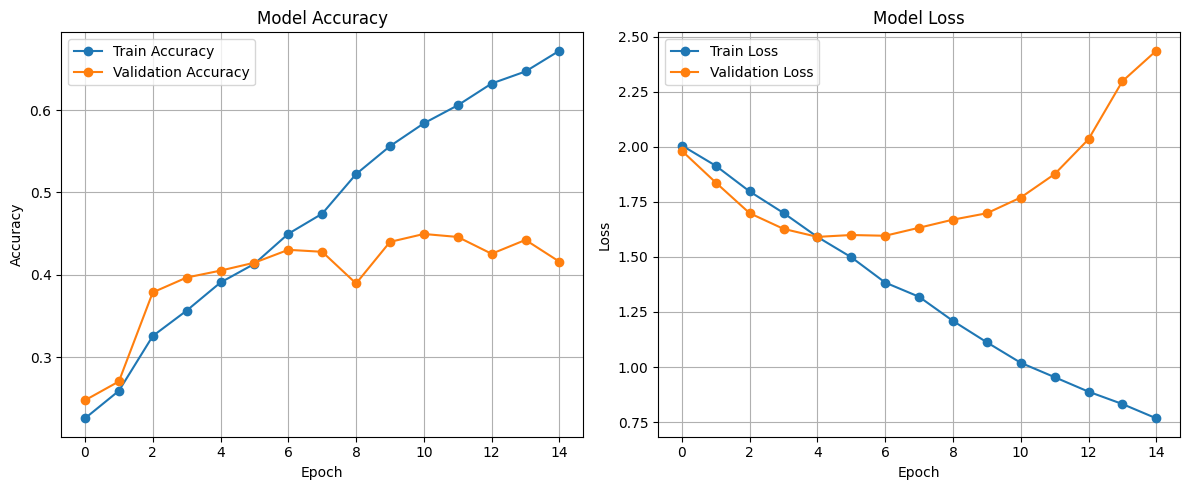

In [167]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot training & validation loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()